## Q1. Perform EDA on the given dataset.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [21]:
car_data = pd.read_csv('CarFeatures.csv')
car_data.head()

,Make,Fuel Type,Aspiration,Number of Doors,Body Style,Drive Wheels,Engine Location,Number of Cylinders,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
0,Toyota,Diesel,Std,Two,Convertible,Fwd,Front,Twelve,95.1,175.9,60.6,59.4,1758,252,279,40,41,5272
1,Mitsubishi,Diesel,Std,Four,Convertible,Fwd,Rear,Four,91.7,153.9,60.5,55.1,1887,95,150,32,42,31393
2,Chevrolet,Gas,Turbo,Four,Hatchback,Rwd,Front,Two,116.2,203.5,65.3,58.5,3815,231,129,13,41,40450
3,Mitsubishi,Gas,Turbo,Four,Hatchback,Fwd,Front,Three,112.8,154.3,64.9,51.4,3367,106,230,39,21,37881
4,Mercedes,Gas,Std,Four,Sedan,Rwd,Rear,Two,115.1,143.4,62.6,49.6,3433,294,96,46,52,18087


### General Information

In [6]:
print("General Information:")
print(car_data.info())
print("\nMissing Values:")
print(car_data.isnull().sum())

General Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 25 non-null     object 
 1   Fuel Type            25 non-null     object 
 2   Aspiration           25 non-null     object 
 3   Number of Doors      25 non-null     object 
 4   Body Style           25 non-null     object 
 5   Drive Wheels         25 non-null     object 
 6   Engine Location      25 non-null     object 
 7   Number of Cylinders  25 non-null     object 
 8   Wheel Base           25 non-null     float64
 9   Length               25 non-null     float64
 10  Width                25 non-null     float64
 11  Height               25 non-null     float64
 12  Curb Weight          25 non-null     int64  
 13  Engine Size          25 non-null     int64  
 14  Horsepower           25 non-null     int64  
 15  City MPG             

## Q2. Summarize the data using descriptive statistics.

In [7]:
print("\nSummary Statistics:")
print(car_data.describe())


Summary Statistics:
       Wheel Base      Length      Width     Height  Curb Weight  Engine Size  \
count   25.000000   25.000000  25.000000  25.000000    25.000000    25.000000   
mean   105.736000  173.928000  65.868000  52.680000  2907.720000   192.360000   
std      9.046403   18.508523   3.632804   3.623534   777.650924    79.342548   
min     91.700000  143.400000  60.500000  47.800000  1488.000000    79.000000   
25%     96.000000  161.400000  62.500000  50.000000  2108.000000   106.000000   
50%    106.800000  172.400000  66.300000  51.800000  3231.000000   199.000000   
75%    113.900000  187.800000  68.500000  55.100000  3433.000000   252.000000   
max    119.600000  207.600000  71.500000  59.800000  3922.000000   319.000000   

       Horsepower   City MPG  Highway MPG         Price  
count   25.000000  25.000000    25.000000     25.000000  
mean   168.760000  29.720000    37.640000  22684.920000  
std     73.189981  10.659581    10.664896  10684.205266  
min     50.000000

## Distribution Analysis

In [9]:
numerical_features = ['Wheel Base', 'Length', 'Width', 'Height', 'Curb Weight', 'Engine Size', 'Horsepower', 'City MPG', 'Highway MPG', 'Price']

## Histograms of numerical features

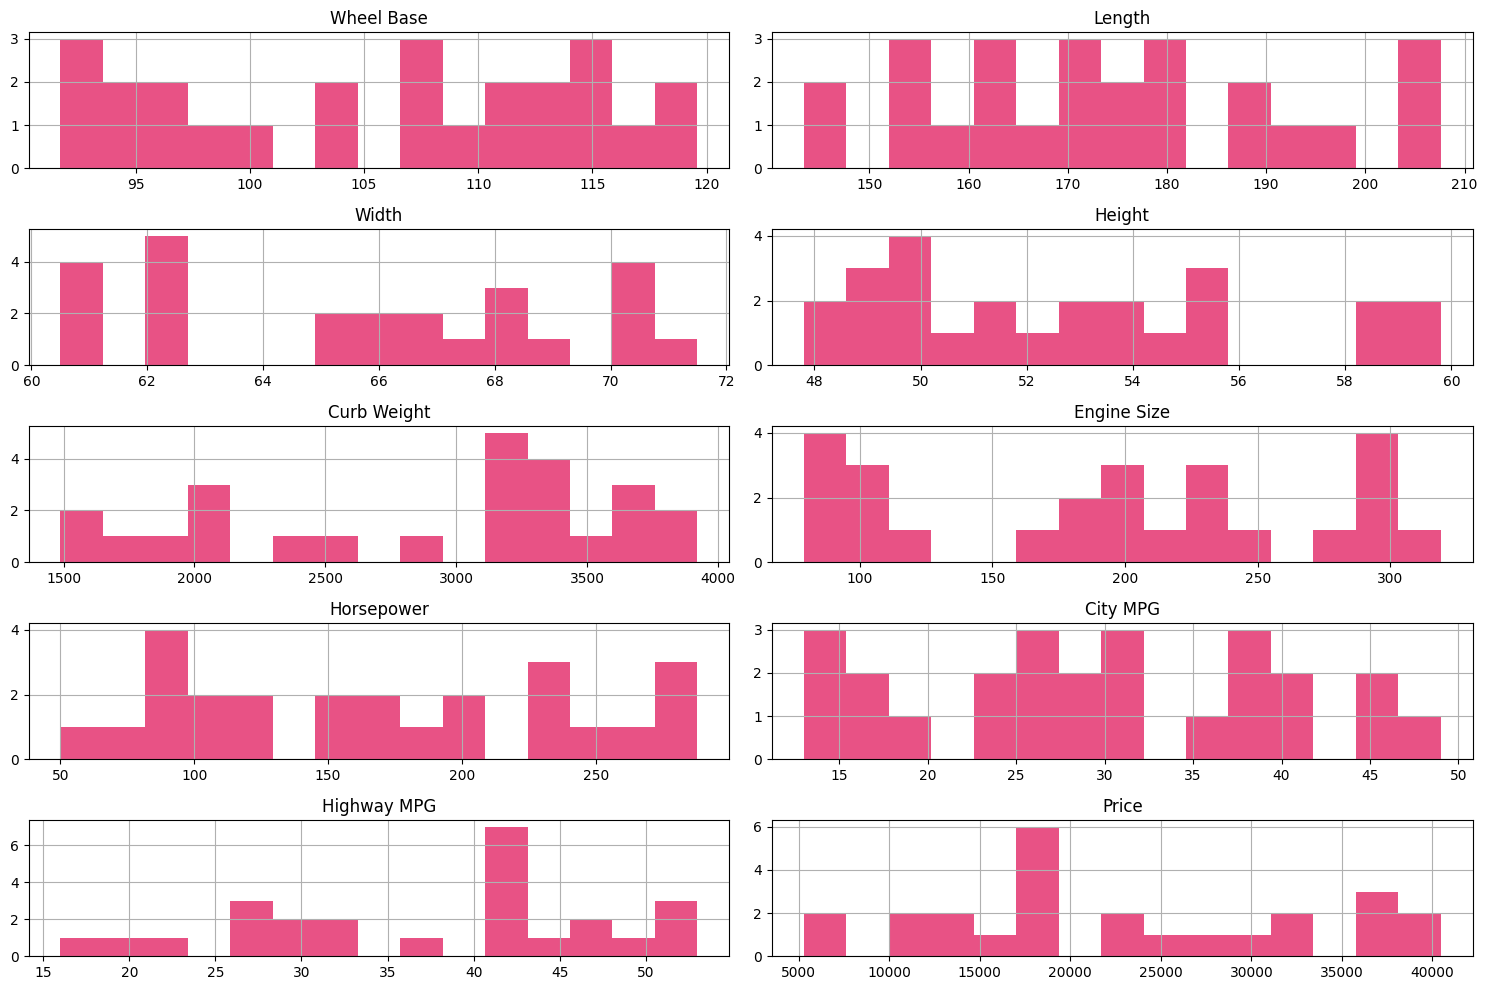

In [15]:
car_data[numerical_features].hist(bins=15, figsize=(15, 10), layout=(5, 2), color = '#E85285')
plt.tight_layout()
plt.show()

## Pairplot for key relationships

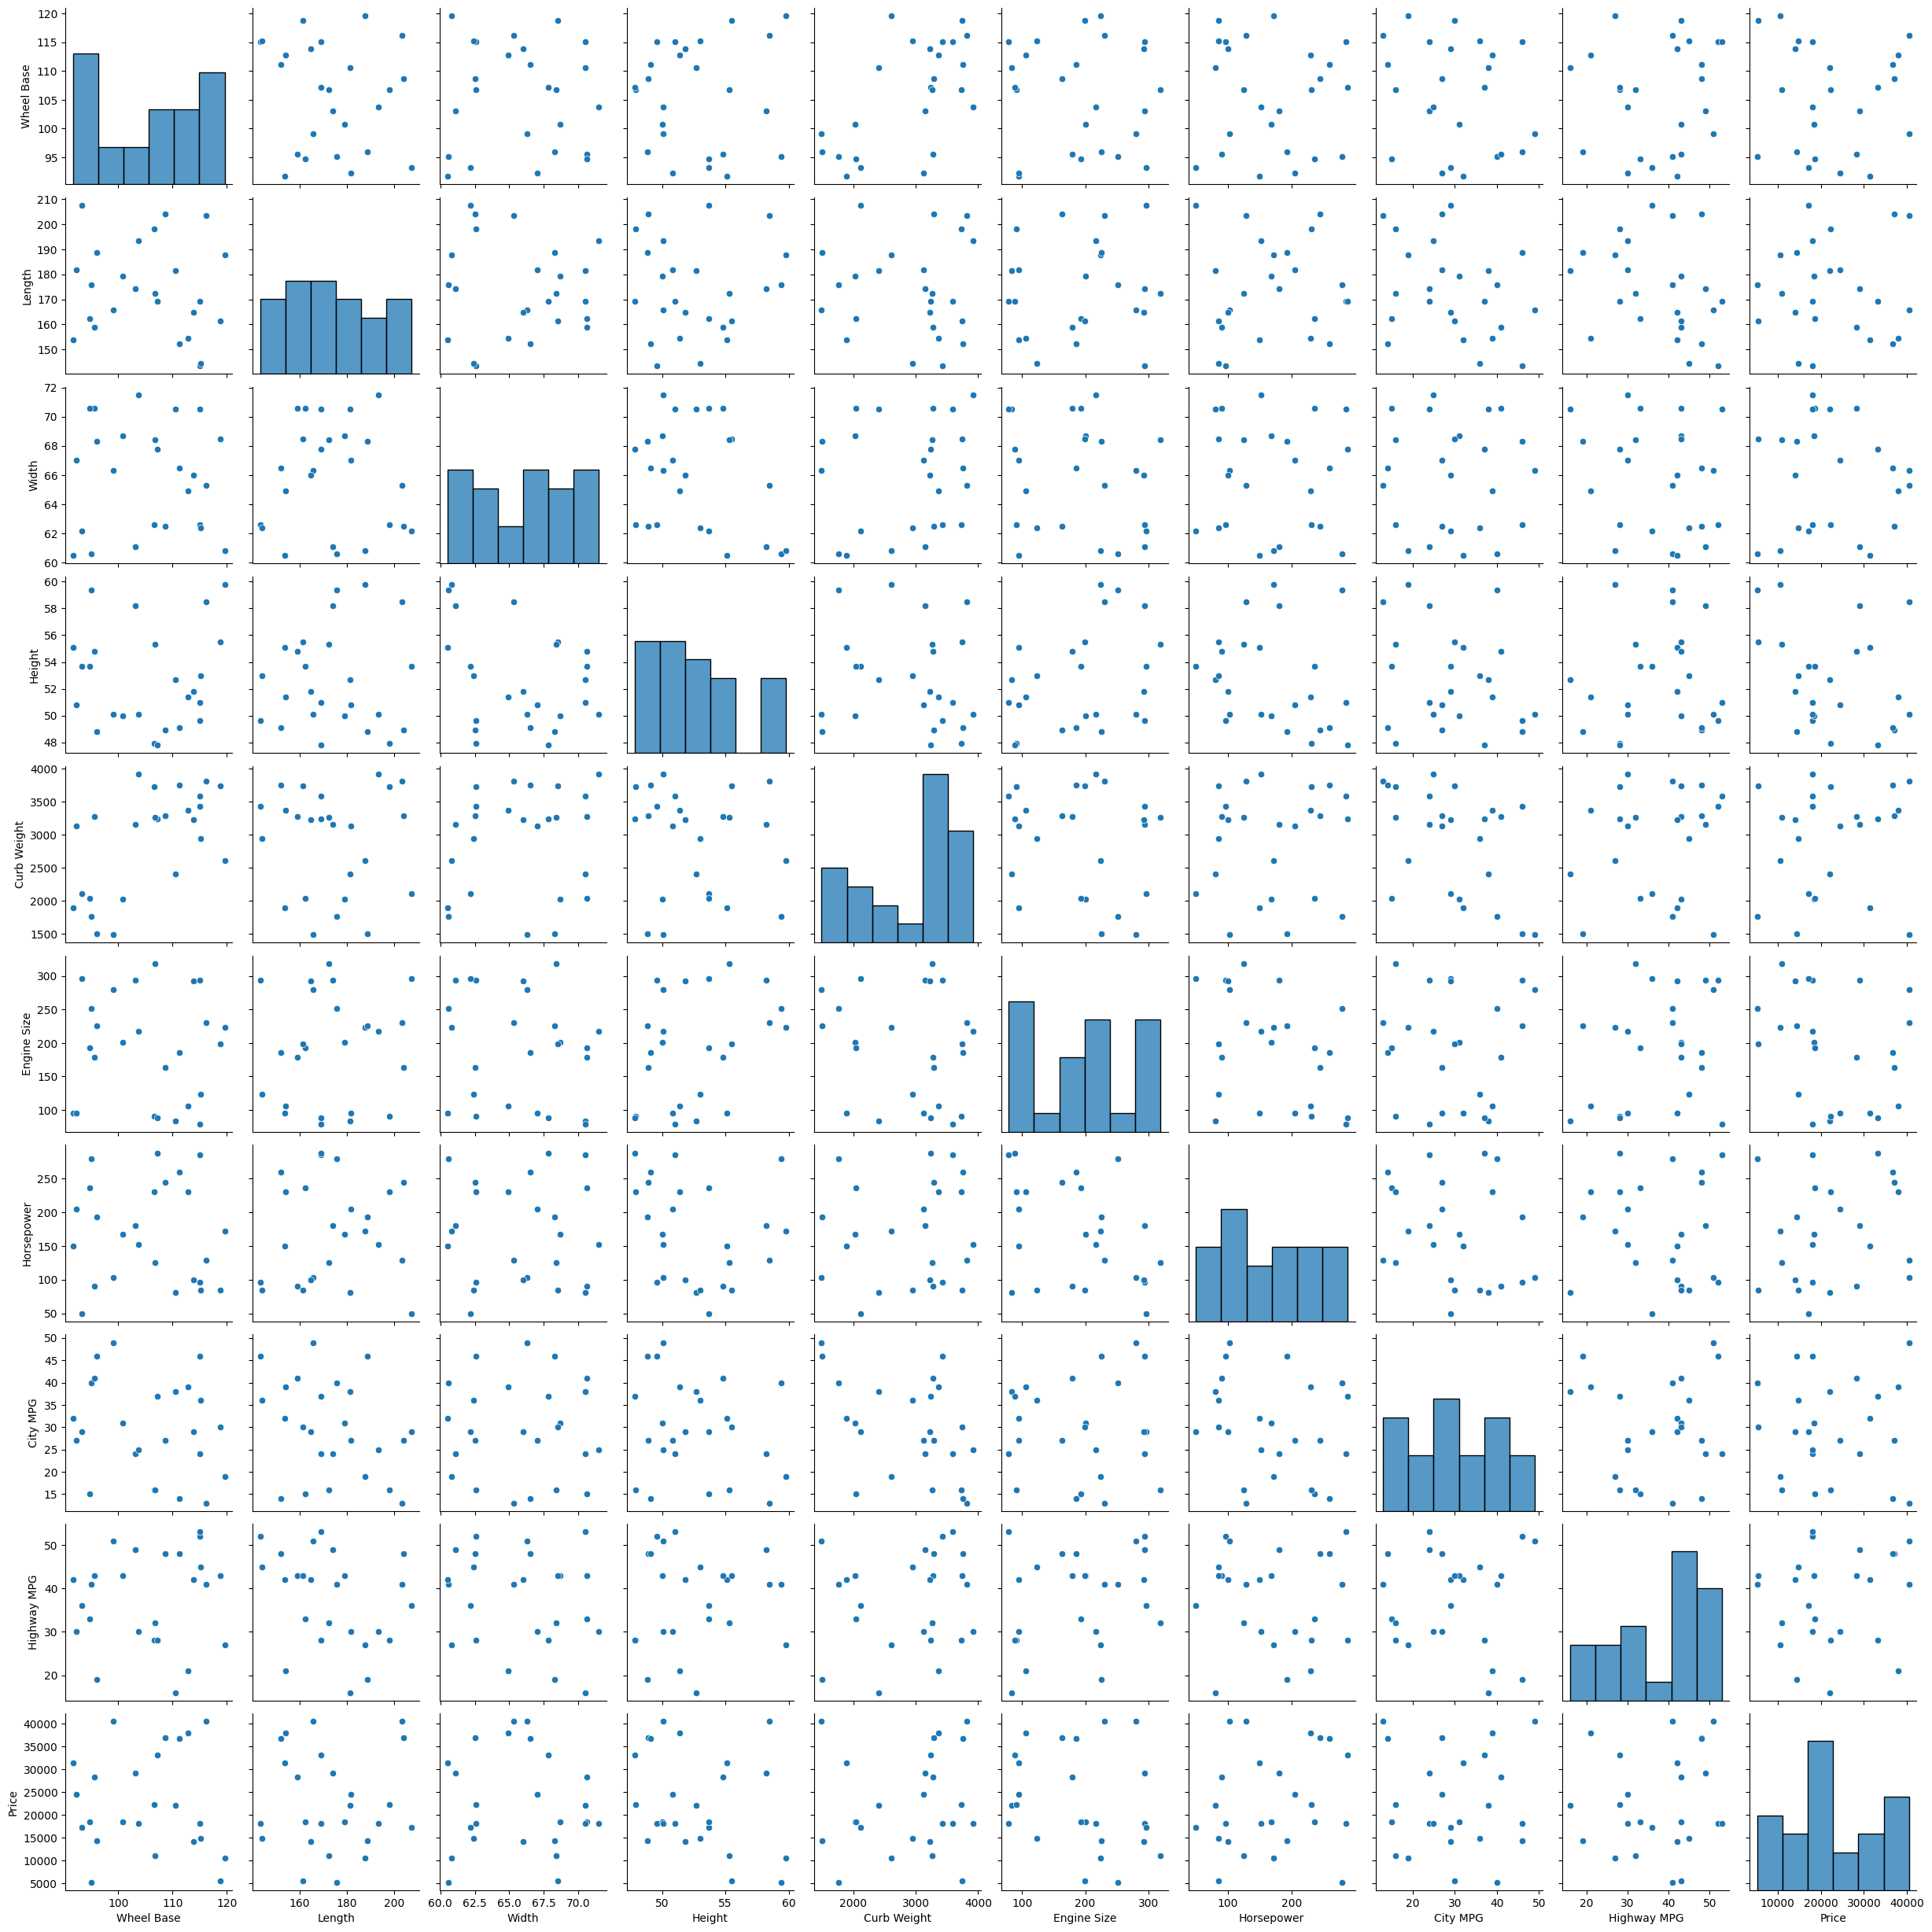

In [17]:
sns.pairplot(car_data[numerical_features])
plt.show()

## Q3. Identify the costliest car and the cheapest car by average price.

In [26]:
costliest_car = car_data.groupby('Make')['Price'].mean().sort_values(ascending=False).index[0]
cheapest_car = car_data.groupby('Make')['Price'].mean().sort_values(ascending=True).index[0]

print(f"Costliest car by average price : {costliest_car}")
print(f"Cheapest car by average price : {cheapest_car}")

Costliest car by average price : Chevrolet
Cheapest car by average price : Ford


## Q4. Which fuel type car has the highest average price?

In [36]:
highest_avg_price_fuel_type = car_data.groupby('Fuel Type')['Price'].mean().sort_values(ascending=False).index[0]
print(f"Fuel type with highest average price : {highest_avg_price_fuel_type}")

Fuel type with highest average price : Gas


## Q5.For the given dataset, construct the following contingency table (take “make” as row variable)

In [31]:
contingency_table = pd.crosstab(car_data['Make'], car_data['Fuel Type'])
contingency_table

Fuel Type,Diesel,Gas
Make,,
Audi,2,1
BMW,4,0
Chevrolet,0,1
Ford,0,2
Honda,0,1
Mazda,2,1
Mercedes,1,2
Mitsubishi,1,2
Nissan,0,1


## Q6. What is the probability that a randomly selected car will be a BMW?

In [37]:
num_bmw = car_data[car_data['Make'] == 'BMW'].shape[0]
total_cars = car_data.shape[0]
probability_bmw = num_bmw / total_cars
print(f"Probability of randomly selecting a BMW : {probability_bmw:.4f}")

Probability of randomly selecting a BMW : 0.1600


## Q7.What is the probability that a randomly selected car will be an Audi?

In [38]:
num_audi = car_data[car_data['Make'] == 'Audi'].shape[0]
total_cars = car_data.shape[0]
probability_audi = num_audi / total_cars
print(f"Probability of randomly selecting an Aud : {probability_audi :.4f}")

Probability of randomly selecting an Aud : 0.1200


## Q8.Form the null and alternate hypothesis to test whether the price of Gas cars is significantly different from that of Diesel  Cars provide code

In [45]:
# Null Hypothesis (H0): The average price of Gas cars is equal to the average price of Diesel cars.
# Alternate Hypothesis (H1): The average price of Gas cars is not equal to the average price of Diesel cars.
# Perform a two-sample t-test to compare the average prices of Gas and Diesel cars.
import scipy.stats as stats

gas_cars = car_data[car_data['Fuel Type'] == 'gas']['Price']
diesel_cars = car_data[car_data['Fuel Type'] == 'diesel']['Price']

t_statistic, p_value = stats.ttest_ind(gas_cars, diesel_cars)

# Set the significance level (alpha)
alpha = 0.05

# Interpret the results
if p_value < alpha:
    print("Reject the null hypothesis : There is significant evidence to suggest that the average price of Gas cars is different from the average price of Diesel cars.")
else:
    print("Fail to reject the null hypothesis : There is not enough evidence to suggest that the average price of Gas cars is different from the average price of Diesel cars.")


Fail to reject the null hypothesis : There is not enough evidence to suggest that the average price of Gas cars is different from the average price of Diesel cars.


## Q9. Form the null and alternate hypothesis and find the p-value.At 0.05 level of significance, is the price of gas cars significantly different from that of diesel cars?

In [47]:
# Null Hypothesis (H0): The average price of Gas cars is equal to the average price of Diesel cars.
# Alternate Hypothesis (H1): The average price of Gas cars is not equal to the average price of Diesel cars.

gas_cars = car_data[car_data['Fuel Type'] == 'gas']['Price']
diesel_cars = car_data[car_data['Fuel Type'] == 'diesel']['Price']

t_statistic, p_value = stats.ttest_ind(gas_cars, diesel_cars)

# Set the significance level (alpha)
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis : There is significant evidence to suggest that the average price of Gas cars is different from the average price of Diesel cars.")
else:
    print("Fail to reject the null hypothesis : There is not enough evidence to suggest that the average price of Gas cars is different from the average price of Diesel cars.")

# Print the p-value
print("p-value:", p_value)


Fail to reject the null hypothesis : There is not enough evidence to suggest that the average price of Gas cars is different from the average price of Diesel cars.
p-value: nan


## Q10. Suppose you randomly select a car from this dataset. What is the probability that it is a 'Luxury Car' ?
(consider BMW, Mercedes and Audi as a luxary car under the column Make)


In [56]:
luxury_cars = car_data[car_data['Make'].isin(['BMW', 'Mercedes', 'Audi'])]
total_cars = car_data.shape[0]
probability_luxury_car = luxury_cars.shape[0] / total_cars
print(f"Probability of randomly selecting a luxury car : {probability_luxury_car:.4f}")

Probability of randomly selecting a luxury car : 0.4000


## Q11. You want to select a subset of three unique cars from the dataset to participate in a race. How many different ways can you arrange the cars in the race, considering their 'Make' as the criteria?

In [61]:
from itertools import permutations

unique_makes = car_data['Make'].unique()
num_ways = len(list(permutations(unique_makes, 3)))
print(f"Number of ways to arrange three unique cars for a race is {num_ways}")

Number of ways to arrange three unique cars for a race is 720


## Q12. If you randomly pick a car with 8 cylinders, what is the probability that BMW?

In [67]:
cars_with_8_cylinders = car_data[car_data['Number of Cylinders'] == 'Eight']
prob_bmw_8_cylinders = (cars_with_8_cylinders['Make'] == 'BMW').mean()
print(f"Probability of randomly selecting a BMW among cars with 8 cylinders : {prob_bmw_8_cylinders:.4f}")

Probability of randomly selecting a BMW among cars with 8 cylinders : 0.4000


## Q13. You are conducting a random survey by selecting 7 cars from the dataset. Calculate the probability that exactly 3 out of the 7 selected cars have 'Turbo' aspiration.

In [70]:
total_cars = len(car_data)
total_turbo_cars = (car_data['Aspiration'] == 'Turbo').sum()
prob_turbo = total_turbo_cars / total_cars

n = 7  # total cars selected
k = 3  # number of turbo cars selected

binomial_prob = stats.binom.pmf(k, n, prob_turbo)
print(f"Probability of selecting exactly 3 cars with turbo aspiration out of 7 : {binomial_prob:.4f}")


Probability of selecting exactly 3 cars with turbo aspiration out of 7 : 0.2932
